<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Teoría de Circuitos II

# Problema desafío



Se pide diseñar un filtro pasabajo que satisfaga la siguiente plantilla:

 * $\omega_p  = 500$ Hz
 * $\omega_s  = 1500$ Hz
 * $\alpha_{max}  = 1$ dB
 * $\alpha_{min}  = 18$ dB

a) Determine si el siguiente diseño puede realizarse con una sola sección de segundo orden cuya respuesta de módulo es de **máxima planicidad**.



b) Si el mismo diseño se planteara mediante una aproximación **Chebyshev**, se pide:
 
   * la función transferencia normalizada
   * las respuestas de módulo, fase y la localización de polos y ceros


<img src="./A1.jpeg" align="center" width="80%" />

In [7]:
from sympy import *
import math as m
import time, sys

S = symbols('S')

w_p = 1
w_s = 3
alpha_max = 1
alpha_min = 18

epsilon_chevy = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
print("epsilon_chevy=", epsilon_chevy)

N_chevy = m.acosh((m.pow(10, alpha_min * 0.1) - 1) / (m.pow(10, alpha_max * 0.1) - 1)) / (2 * m.acosh(w_s))

print("N_chevy=", N_chevy)
Redondeado=m.ceil(N_chevy)
print("Redondeado=" ,Redondeado )
a=(1/Redondeado)*(asinh(1/epsilon_chevy))
print("a=", a)
Sk=[]

for i in range(Redondeado):
    Sk.append( -sinh(a)*sin((2*(i+1)-1)/(2*Redondeado)*m.pi)+I*cosh(a)*cos((2*(i+1)-1)/(2*Redondeado)*m.pi) )
    print("Sk =",Sk[i])
    time.sleep(0.5)
"""
algo que estaba probando y quedo
expand_anterior=1

for i in range(0,Redondeado+1):
    print("exp_ant=",expand_anterior)
    expand_anterior=expand( (expand_anterior) * (S-(Sk[Redondeado-1-i])) )
    print(i)
"""

epsilon_chevy= 0.5088471399095875
N_chevy= 1.7509701524232137
Redondeado= 2
a= 0.713987679431763
Sk = -0.548867164281964 + 0.895128574019914*I
Sk = -0.548867164281964 - 0.895128574019914*I


'\nalgo que estaba probando y quedo\nexpand_anterior=1\n\nfor i in range(0,Redondeado+1):\n    print("exp_ant=",expand_anterior)\n    expand_anterior=expand( (expand_anterior) * (S-(Sk[Redondeado-1-i])) )\n    print(i)\n'

0 zeros: []
2 poles: [-0.54885+0.89513892j -0.54885-0.89513892j]
gain: 1.0


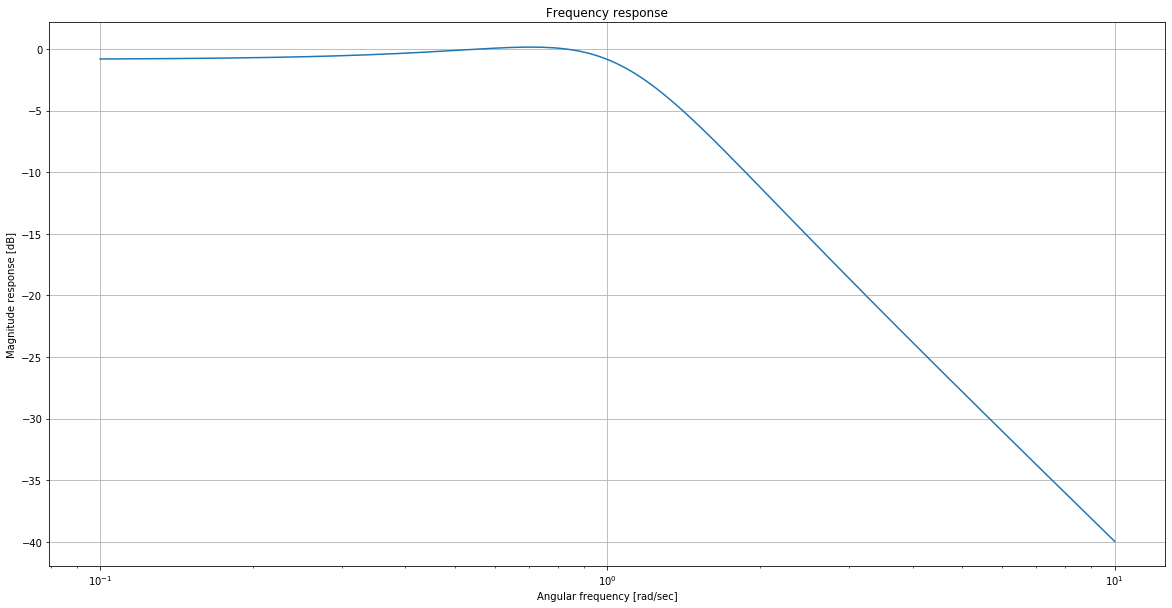

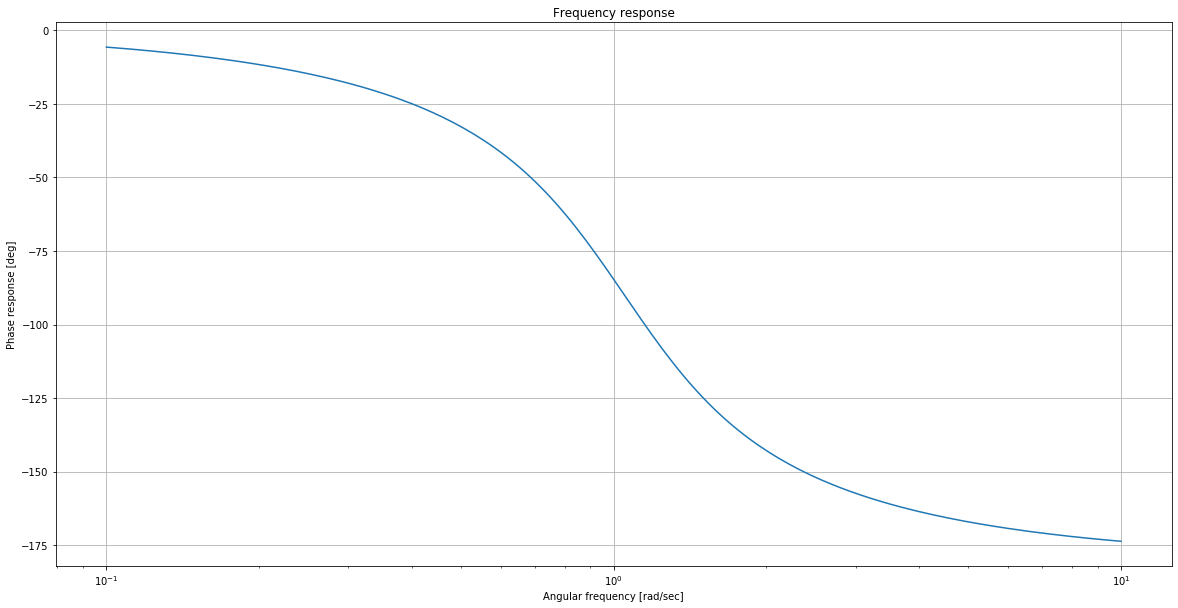

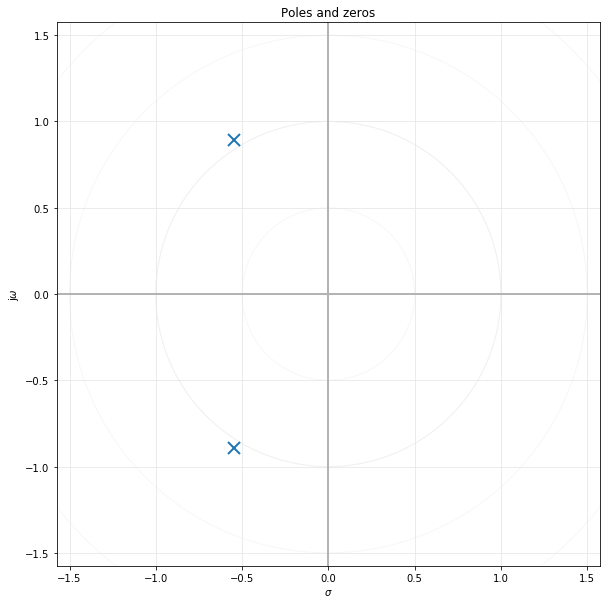

In [3]:
%matplotlib inline

from scipy import signal
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

from splane import pzmap, grpDelay, bodePlot


num1=[1]
den1=[1,1.0977, 1.10251]
sys1=signal.TransferFunction(num1, den1)

bodePlot(sys1)

pzmap(sys1)

In [9]:
import math as m

##########Constantes de Desnormalizacion#############
N_z=1000
N_w=500*2*m.pi
####Vector de resistencias Normalizadas#############
#####Se debe inicializar con los valores de tus resistencias########
R_n=[1,0.95582,1.053792,1.14843,1,0.91099]

####Vector de resistencias Desnormalizadas##########
R=[]
for i in range(len(R_n)):
    
    R.append(R_n[i]*N_z)
    print('R[',i+1,']=',R[i])

####Vector de capacitores Normalizados#############
#####Se debe inicializar con los valores de tus capacitores########
C_n=[1,1]

####Vector de Capacitores Desnormalizados##########

C=[]
for i in range(len(C_n)):
    C.append(C_n[i]/N_z / N_w)
    print('C[',i,']=',C[i])


R[ 1 ]= 1000
R[ 2 ]= 955.82
R[ 3 ]= 1053.7920000000001
R[ 4 ]= 1148.43
R[ 5 ]= 1000
R[ 6 ]= 910.99
C[ 0 ]= 3.183098861837907e-07
C[ 1 ]= 3.183098861837907e-07


 c) Implemente el filtro solicitado mediante la siguiente red y corrobore su funcionamiento respecto a la plantilla de requerimientos.
  
 <img src="./circuito_desnormalizado.png" align="center" width="100%" height="100%" />
 <img src="./G_ripple.png" align="center" width="100%" height="100%" />
 <img src="./G_ripple_numeritos.png" align="center" width="100%" height="100%" />
 <img src="./G_especificaciones.png" align="center" width="100%" height="100%" />
 <img src="./G_especificaciones_numeritos.png" align="center" width="100%" height="100%" />

 

 